In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Churn Modeling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
#CustomerID, Surname and Row Number are unnecessary features 
df.drop(['RowNumber','Surname','CustomerId'],axis = 1, inplace = True)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data visualization

Text(0, 0.5, 'Counts')

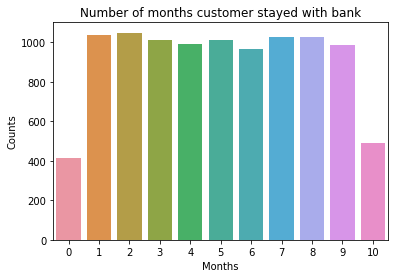

In [9]:
#Number of months customer stayed with bank
sns.countplot(df['Tenure'])
plt.title("Number of months customer stayed with bank")
plt.xlabel("Months")
plt.ylabel("Counts")

<AxesSubplot:xlabel='Age', ylabel='Count'>

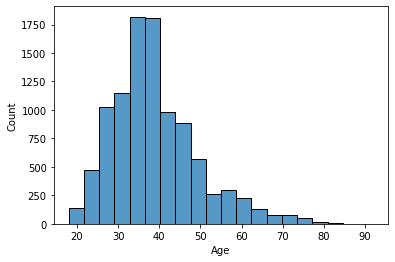

In [10]:
sns.histplot(df['Age'],bins = 20)

<AxesSubplot:xlabel='Balance', ylabel='Count'>

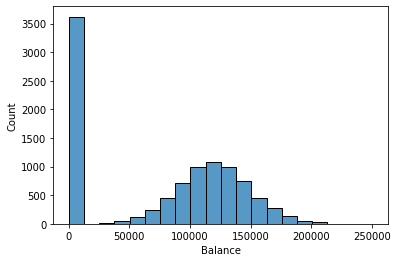

In [11]:
sns.histplot(df['Balance'],bins = 20)

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

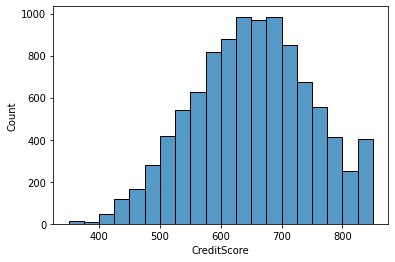

In [12]:
sns.histplot(df['CreditScore'],bins = 20)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

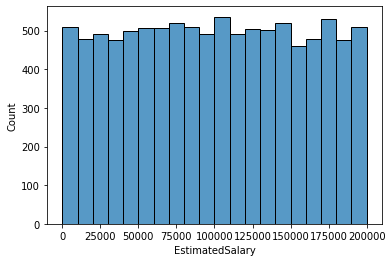

In [13]:
sns.histplot(df['EstimatedSalary'],bins = 20)

([<matplotlib.patches.Wedge at 0x205f4bf1180>,
 [Text(-0.0048380159962871415, 1.0999893606763749, 'France'),
  Text(-0.7687238787085311, -0.786805947043686, 'Germany'),
  Text(0.7834173384027578, -0.7721769705773016, 'Spain')],
 [Text(-0.002638917816156622, 0.599994196732568, '50.14%'),
  Text(-0.4193039338410169, -0.4291668802056469, '25.09%'),
  Text(0.42731854821968607, -0.42118743849671, '24.77%')])

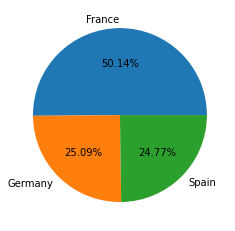

In [14]:
x = df['Geography'].value_counts().index
y = df['Geography'].value_counts().values
plt.pie(y,labels = x, autopct = "%1.2f%%")

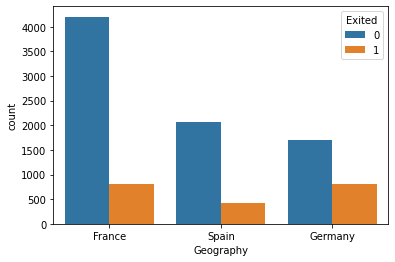

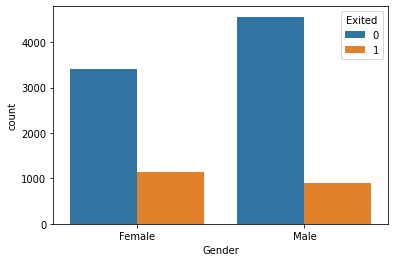

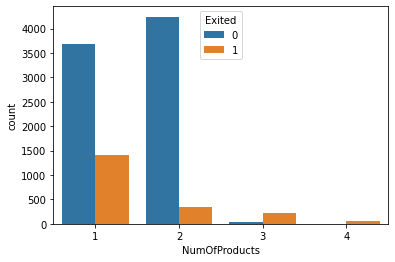

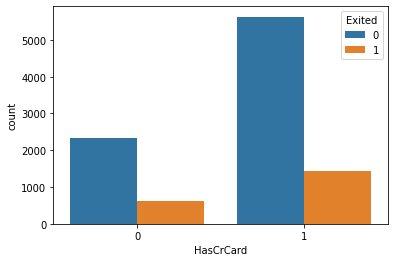

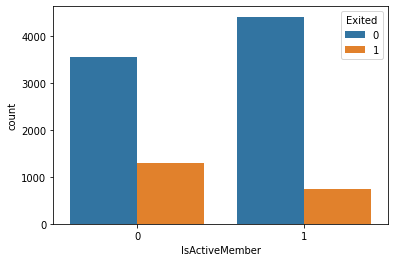

In [15]:
lst = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']
for fe in lst:
    sns.countplot(fe, hue = 'Exited', data = df)
    plt.show()

<AxesSubplot:>

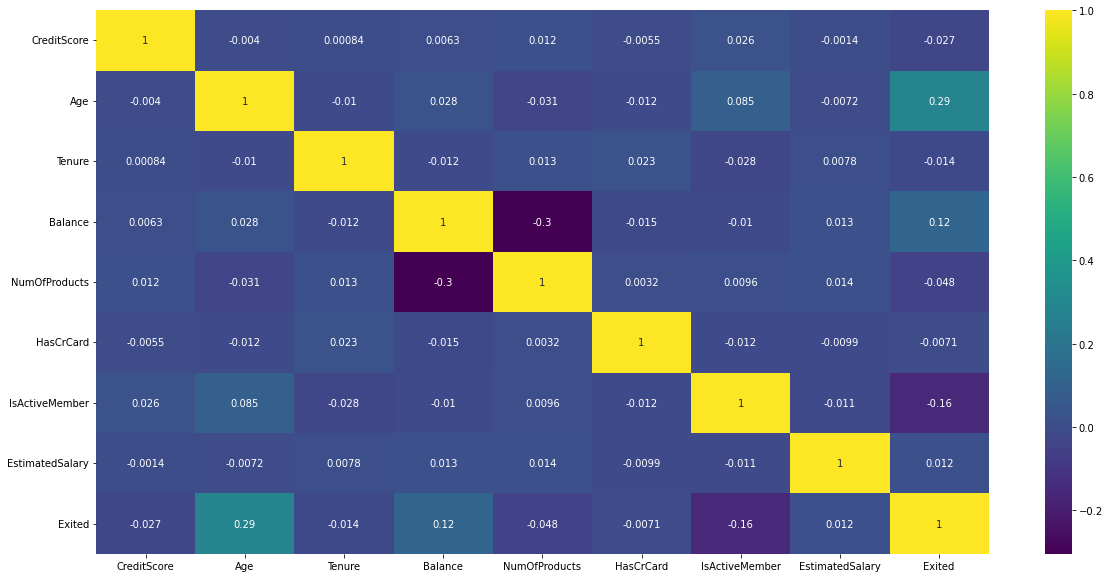

In [16]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True,cmap = 'viridis')

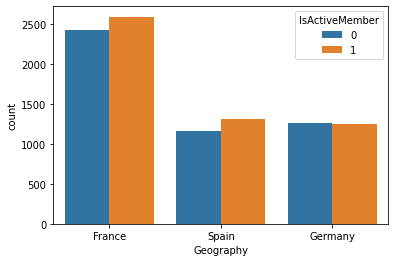

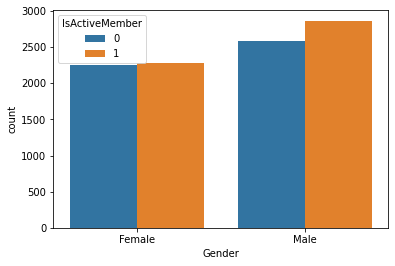

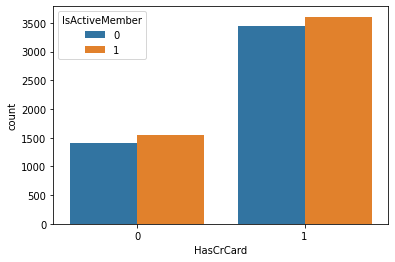

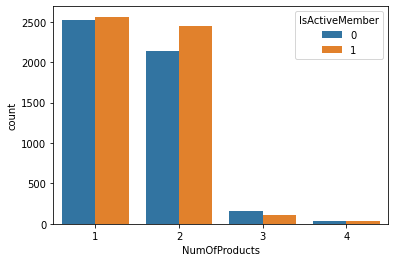

In [17]:
#how many members are active as per geography, gender, Have credit card and Number of product purchase through bank
lst = ['Geography','Gender','HasCrCard','NumOfProducts']
for fe in lst:
    sns.countplot(fe, hue = 'IsActiveMember', data = df)
    plt.show()

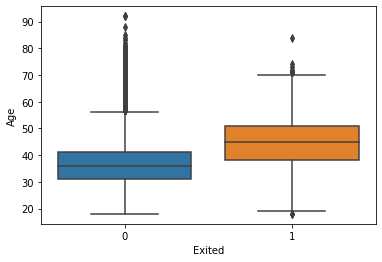

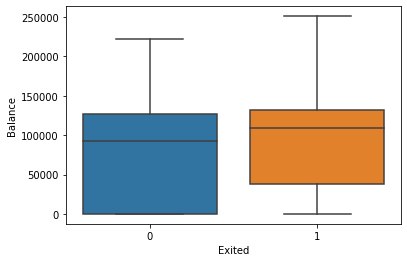

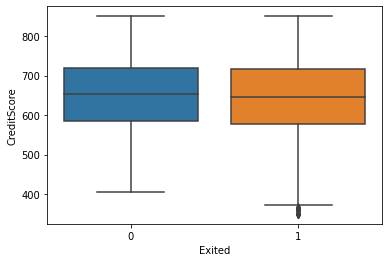

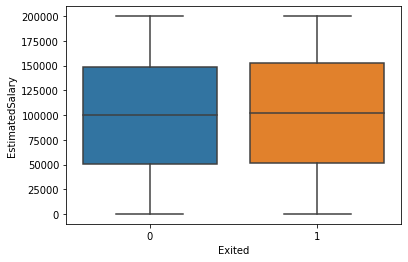

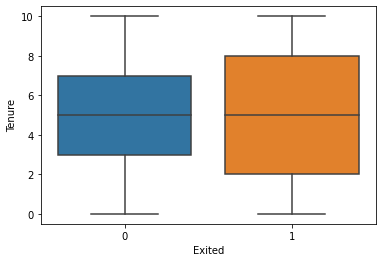

In [18]:
lst = ['Age','Balance','CreditScore','EstimatedSalary','Tenure']
for fe in lst:
    sns.boxplot('Exited', fe, data = df)
    plt.show()

<AxesSubplot:xlabel='Exited', ylabel='Age'>

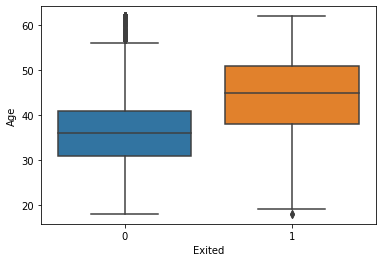

In [19]:
for i in df['Age']:
    Q1 = df['Age'].quantile(0.25)
    Q3 = df['Age'].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if i > upper or i < lower:
        df['Age'] = df['Age'].replace(i,upper)
        
sns.boxplot('Exited', 'Age', data = df)

In [20]:
#converting categorical variables to numerical

In [21]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [22]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [23]:
df['Geography'] = df['Geography'].map({'France':1,'Germany':2,'Spain':3})

In [24]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':2})

In [25]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,2,42,2,0.00,1,1,1,101348.88,1
1,608,3,2,41,1,83807.86,1,0,1,112542.58,0
2,502,1,2,42,8,159660.80,3,1,0,113931.57,1
3,699,1,2,39,1,0.00,2,0,0,93826.63,0
4,850,3,2,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:xlabel='Exited', ylabel='count'>

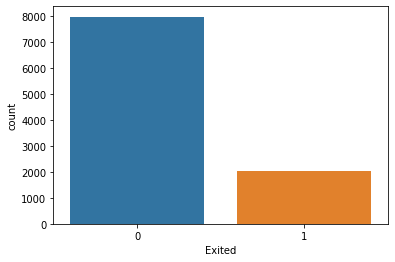

In [26]:
sns.countplot(df['Exited'])

In [27]:
x = df.drop('Exited', axis = 1)
y = df['Exited']

In [28]:
#balancing the dataset
from imblearn.under_sampling import NearMiss

smote = NearMiss()

x, y = smote.fit_resample(x, y)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state = 0)

In [30]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
x_train=scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import scikitplot as skp

In [32]:
lst = [LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB()]
for algo in lst:
    print(algo)
    alg = algo
    alg.fit(x_train, y_train)
    y_pred = alg.predict(x_test)
    print("Accuracy score :- ", accuracy_score(y_test,y_pred))
    print("--------")
    print("Confusion matrix\n")
    print(confusion_matrix(y_test,y_pred))
    print("--------")

LogisticRegression()
Accuracy score :-  0.9116564417177914
--------
Confusion matrix

[[404   7]
 [ 65 339]]
--------
RandomForestClassifier()
Accuracy score :-  0.9251533742331288
--------
Confusion matrix

[[392  19]
 [ 42 362]]
--------
DecisionTreeClassifier()
Accuracy score :-  0.8871165644171779
--------
Confusion matrix

[[365  46]
 [ 46 358]]
--------
SVC()
Accuracy score :-  0.9263803680981595
--------
Confusion matrix

[[391  20]
 [ 40 364]]
--------
KNeighborsClassifier()
Accuracy score :-  0.8932515337423312
--------
Confusion matrix

[[381  30]
 [ 57 347]]
--------
GaussianNB()
Accuracy score :-  0.8797546012269939
--------
Confusion matrix

[[411   0]
 [ 98 306]]
--------


In [33]:
#SVC performing great on the dataset

In [34]:
from sklearn.model_selection import RandomizedSearchCV

# defining parameter range
param_grid = {'C': [1,2,3,4,5,6,7,8,9,10],
              'gamma': ['auto',1, 10],
              'kernel': ['rbf', 'sigmoid'],
             'degree' : [int(x) for x in np.linspace(start = 1, stop = 20)]}

rsvc = RandomizedSearchCV(SVC(), param_grid, cv = 5, n_iter=40, verbose = 2)

# fitting the model for grid search
rsvc.fit(x_train, y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ............C=2, degree=8, gamma=10, kernel=sigmoid; total time=   0.3s
[CV] END ............C=2, degree=8, gamma=10, kernel=sigmoid; total time=   0.3s
[CV] END ............C=2, degree=8, gamma=10, kernel=sigmoid; total time=   0.3s
[CV] END ............C=2, degree=8, gamma=10, kernel=sigmoid; total time=   0.3s
[CV] END ............C=2, degree=8, gamma=10, kernel=sigmoid; total time=   0.3s
[CV] END ..............C=6, degree=4, gamma=auto, kernel=rbf; total time=   0.2s
[CV] END ..............C=6, degree=4, gamma=auto, kernel=rbf; total time=   0.1s
[CV] END ..............C=6, degree=4, gamma=auto, kernel=rbf; total time=   0.2s
[CV] END ..............C=6, degree=4, gamma=auto, kernel=rbf; total time=   0.1s
[CV] END ..............C=6, degree=4, gamma=auto, kernel=rbf; total time=   0.1s
[CV] END .................C=2, degree=8, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .................C=2, degree=8, gamma=

[CV] END .........C=3, degree=17, gamma=auto, kernel=sigmoid; total time=   0.2s
[CV] END .........C=3, degree=17, gamma=auto, kernel=sigmoid; total time=   0.2s
[CV] END .........C=3, degree=17, gamma=auto, kernel=sigmoid; total time=   0.2s
[CV] END .........C=3, degree=17, gamma=auto, kernel=sigmoid; total time=   0.2s
[CV] END .........C=7, degree=14, gamma=auto, kernel=sigmoid; total time=   0.2s
[CV] END .........C=7, degree=14, gamma=auto, kernel=sigmoid; total time=   0.2s
[CV] END .........C=7, degree=14, gamma=auto, kernel=sigmoid; total time=   0.2s
[CV] END .........C=7, degree=14, gamma=auto, kernel=sigmoid; total time=   0.2s
[CV] END .........C=7, degree=14, gamma=auto, kernel=sigmoid; total time=   0.2s
[CV] END ...........C=6, degree=11, gamma=10, kernel=sigmoid; total time=   0.5s
[CV] END ...........C=6, degree=11, gamma=10, kernel=sigmoid; total time=   0.9s
[CV] END ...........C=6, degree=11, gamma=10, kernel=sigmoid; total time=   0.4s
[CV] END ...........C=6, deg

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=40,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                        'degree': [1, 1, 1, 2, 2, 2, 3, 3, 4, 4,
                                                   4, 5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                   8, 9, 9, 9, 10, 10, 11, 11,
                                                   11, 12, ...],
                                        'gamma': ['auto', 1, 10],
                                        'kernel': ['rbf', 'sigmoid']},
                   verbose=2)

In [35]:
rsvc.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'degree': 4, 'C': 6}

Accuracy score :-  0.9349693251533743
--------
Confusion matrix



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

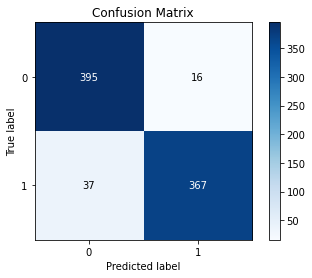

In [38]:
svc = SVC(kernel = 'rbf', gamma = 'auto', degree = 4, C= 3)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print("Accuracy score :- ", accuracy_score(y_test,y_pred))
print("--------")
print("Confusion matrix\n")
skp.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

In [39]:
import joblib
 
joblib.dump(svc, 'svc.sav', compress=5)


['svc.sav']